# Churn for Bank Customers

## What is our problem?
* Our problem with the data set is whether the bank will lose its customers.
* While solving this problem, we need to understand our data set well and ask ourselves the right questions while analyzing the data set.

### The story of the data set
* We have 14 variables and 10000 observations.
* The variable exited is our target variable, the other variables are our independent variables.
* We have 11 continuous variables and 3 categorical variables.
* Binary Classification problem.

### Features
* RowNumber : It corresponds to the record (line) number and has no effect on the output.
* CustomerId : Contains random numbers, no effect on our target variable.
* Surname : Customer's last name, it has no effect on our problem.
* CreditScore : Refers to the credit score.
* Geography : Refers to the country. (France, Germany, Spain)
* Gender : Refers to gender. (Femal or Male)
* Age : Refers to the age of the customer.
* Tenure : It refers to the number of years that the customer is a customer of the bank.
* Balance : Person's account balance.
* NumOfProducts : Refers to the number of products a customer has purchased through a bank.
* HasCrCard : Indicates whether the customer has a credit card.(0 or 1)
* IsActiveMember : It expresses whether the customer is active in using banks.(0 or 1)
* EstimatedSalary : Estimated salary of the customer.
* Exited : Whether the customer has left the bank.(1 left 0 remainder)

# INTRODUCTION
1. [Import Libraries](#1)
2. [Import data and let's simply examine the data set](#2)
3. [Data visualization](#3)
    * [Analysis of Categorical Variables](#4)
    * [Analysis of Numerical Variables](#5)
    * [The Effect of Categorical Variables on the Dependent Variable](#6)
4. [Outliers](#7)
5. [Correlation Matrix](#8)
6. [The Effect of Numerical Variables on The Dependent Variable](#9)
    * [Age-Exited](#10)
    * [Balance-Exited](#11)
    * [NumOfProducts-Balance-Exited](#12)
7. [Feature Engineering](#13)
8. [Feature Scaling](#14)
9. [Train-Test Split](#15)
10. [Modeling](#16)
    * [Logistic Regression](#17)
        * [Model & Prediction](#18)
        * [Model Tuning](#19)
    * [KNN](#20)
        * [Model & Prediction](#21)
        * [Model Tuning](#22)
    * [Random Forest](#23)
        * [Model & Prediction](#24)
        * [Model Tuning](#25)
11. [Comparison of Models](#26)


<a id = "1"></a><br>
# Import Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "2"></a><br>
# Import data and let's simply examine the data set

In [ ]:
ss = pd.read_csv("/kaggle/input/churn-for-bank-customers/churn.csv")
df = ss.copy()
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

#### We have 14 variables and 10000 observations in the dataset, also;
* We have 3 String variables. (Surname, Geography, Gender)
* We have 11 numerical variables. (RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited)

In [ ]:
df.isnull().any()

* There is no missing value in the data set.

#### The variables that would not affect our problem in our data set were removed from the data set.

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
df.columns

<a id = "3"></a><br>
# Data visualization

<a id = "4"></a><br>
## Analysis of Categorical Variables
* I am collecting our categorical variables in the "cat_list" list.
* Then I create a function rather than create and analyze a chart one by one.
* Then I go through the list with the for loop and call the function.

In [ ]:
cat_list = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [ ]:
def category(variable):
    print(df[variable].value_counts())
    
    sns.countplot(df[variable])
    plt.show()

In [ ]:
for i in cat_list:
    category(i)

* Customers mainly live in France, the number of customers living in Germany and Spain is very close.
* Customers' gender is predominantly male but their numbers are close to each other, so we can say that it is a balanced variable.
* We have understood that customers have generally been customers of the bank for 1 to 9 years.
* Customers generally bought 1 and 2 products, there is a serious decrease in the number of customers who bought more than 2 products. An unbalanced distribution.
* Customers usually hold credit cards. There is an unbalanced distribution.
* Customers use the bank more actively, but there is a balanced distribution.
* Customers generally did not leave the bank. There is an unbalanced distribution.

<a id = "5"></a><br>
## Analysis of Numerical Variables
* I am collecting our continuous variables in the "num_list" list.
* Then I create a function rather than create and analyze a chart one by one.
* Then I go through the list with the for loop and call the function.

In [ ]:
num_list = ["CreditScore","Age","Balance","EstimatedSalary"]

In [ ]:
def numeric(variable):
    
    plt.hist(df[variable], bins = 20, color = "green")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(variable))
    plt.show()

In [ ]:
for i in num_list:
    numeric(i)

* Credit Score variable is skewed to the left.
* The age variable is skewed to the right.
* Since the ratio of the balance variable is too much, it is added to the left.
* EstimatedSalary variable displayed a normal distribution.

<a id = "6"></a><br>
## The Effect of Categorical Variables on the Dependent Variable
* We have collected our categorical variables in the list named "cat_effect" that we will examine with dependent variables.
* Then we created a function called categorical_effect, and we navigate through our list with the for loop and call our function.

In [ ]:
cat_effect = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]

In [ ]:
def kategorik_etki(variable):
    
    print("{} effect of variable on customer churn : \n".format(variable))
    print(df.groupby(variable)["Exited"].mean())
    
    sns.countplot(y = variable, hue = "Exited" , data = df)
    plt.show()

In [ ]:
for i in cat_effect:
    kategorik_etki(i)

* Average loss of customers is highest in Germany.
* Female customers left the bank more often.
* We cannot draw an exact conclusion from the Tenure variable. The distributions are close.
* It is observed that customers who buy more than 2 products have a high rate of loss, but let's not forget that our data is unstable. All of the customers (60 people) who bought 4 products left the bank.
* Customer churn rate with or without credit cards was close, but the data in our HasCrCard variable was unstable.
* Customers who do not actively use the bank leave the bank more.

<a id = "7"></a><br>
# Outliers
* We used the boxplot graph to see the outliers.

In [ ]:
list_ol = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [ ]:
def outlier_show(variable):
    
    sns.boxplot(df[variable])
    plt.show()

In [ ]:
for i in list_ol:
    outlier_show(i)

* The variables Credit Score, Age, Num Products have outlier observations.
* We create a function to detect outliers and keep the indexes of these values in a list.

In [ ]:
  def outlier(df_ol, degiskenler):
    
    aykiri_indexler = []
    
    for i in degiskenler:
        
        Q1 = df_ol[i].quantile(0.25)
        Q3 = df_ol[i].quantile(0.75)


        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR

        toplam_filtre = ((df_ol[i] < alt_sinir) | (df_ol[i] > ust_sinir))

        aykiri_gozlemler = df_ol[i][toplam_filtre]
        aykiri_index = aykiri_gozlemler.index
        
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    
    ortak_indexler = [i for i, v in aykiri_indexler.items() if v > 0]
    
    return ortak_indexler

In [ ]:
ortak_indexler = outlier(df, ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"])

In [ ]:
df.loc[ortak_indexler]

* There are 1 or more outliers in 432 observations.

In [ ]:
df.shape

In [ ]:
df = df.drop(ortak_indexler, axis = 0).reset_index(drop = True)

* We deleted outlier observations from the data set.

In [ ]:
df.shape

<a id = "8"></a><br>
# Correlation Matrix

In [ ]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

* Age has the strongest relation with Exited (0.35). Here we can make the following comment: As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)
* Exited and Balance variable have a relatively strong relationship (0.12).
* Exited and the variable NumOfProducts have a moderately strong relationship (-0.11). They have a strong negative relationship.

<a id = "9"></a><br>
# The Effect of Numerical Variables on The Dependent Variable

<a id = "10"></a><br>
## Age-Exited

In [ ]:
sns.lineplot(x = "Age", y = "Exited", data = df);

In [ ]:
df.groupby(df["Exited"])["Age"].mean()

* Yes, as we said while analyzing the correlation matrix, as the age of the customer increases, the customer losing rate increases.
* Average age of customers who did not leave the bank ==> 36
* Average age of customers leaving the bank ==> 43

<a id = "11"></a><br>
## Balance-Exited

In [ ]:
(sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Balance", shade= True).add_legend());

In [ ]:
df.groupby(df["Exited"])["Balance"].mean()

* Since the value in the account balance of the customers is too much 0, we may not be able to make an accurate analysis, but we can say the following comments, when the customer's account balance is 0, usually customers have not left the bank and customers with account balances between 50000 and 200000 usually leave the bank.
* Average account balance of customers who cannot leave the bank ==> 72,870
* Average account balance of customers leaving the bank ==> 90,902
* But here, the high number of customers with 0 account balance makes our variable unbalanced.

<a id = "12"></a><br>
## NumOfProducts-Balance-Exited

In [ ]:
(sns.FacetGrid(df, col = "Exited", row = "NumOfProducts", height = 5).map(plt.hist, "Balance",bins =10).add_legend());

In [ ]:
df.groupby(["NumOfProducts","Exited"])["Balance"].mean()

* We deleted the value 4 in the NumOfProducts variable in the process of deleting outliers.

<a id = "13"></a><br>
# Feature Engineering
* We will split Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember variables into variables according to the values they get for our model. We will briefly implement the dummies process.

In [ ]:
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

df = pd.get_dummies(df, columns = ["Geography"])
df = pd.get_dummies(df, columns = ["Gender"])
df = pd.get_dummies(df, columns = ["NumOfProducts"])
df = pd.get_dummies(df, columns = ["HasCrCard"])
df = pd.get_dummies(df, columns = ["IsActiveMember"])

In [ ]:
df.head()

* While examining the relationships between variables, we realized that the Tenure variable has no effect on our target variable. We will delete the Tenure variable so that it does not mislead our model.

In [ ]:
df.drop(["Tenure"], axis = 1 , inplace = True)

<a id = "14"></a><br>
# Feature Scaling
* Since the variables in our data set are unstable, we applied the normalization method.

In [ ]:
x_df = df.drop(["Exited"], axis=1)
y = df["Exited"]

x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df)).values
x.head()

<a id = "15"></a><br>
# Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

<a id = "16"></a><br>
# Modeling
* Logistic Regression
* KNN
* Random Forest

<a id = "17"></a><br>
## Logistic Regression
* y = ax1 + bx2 + cx3 + e ===> y is the output of our dependent variable, x is the input of our independent variables (a, b, and c are the input coefficients of our independent variables), and e is our constant.

<a id = "18"></a><br>
### Model & Prediction

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj.fit(x_train,y_train)
loj

In [ ]:
loj.intercept_

* Constant value (the "e" value in the equation).

In [ ]:
loj.coef_

* Coefficients of the inputs of the independent variables (the values a, b, c in the equation, of course, we have 16 arguments, not 3)

In [ ]:
print("Test accurarcy {}".format(loj.score(x_test,y_test)))

In [ ]:
y_pred = loj.predict(x_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id = "19"></a><br>
### Model Tuning
* I apply cross validation to prevent overfitting.

In [ ]:
cross_val_score(loj, x_test, y_test, cv = 10).mean()

<a id = "20"></a><br>
## KNN

<a id = "21"></a><br>
### Model & Prediction

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

<a id = "22"></a><br>
### Model tuning
* We will find the optimum hyperparameter values.

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

In [ ]:
print("The best parameters: " + str(knn_cv.best_params_))

In [ ]:
knn = KNeighborsClassifier(7)
knn_model = knn.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id = "23"></a><br>
## Random Forest

<a id = "24"></a><br>
### Model & Prediction

In [ ]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

<a id = "25"></a><br>
### Model Tuning

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
rf_cv_model.fit(x_train, y_train)

In [ ]:
print("The best parameters: " + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id = "26"></a><br>
# Comparison of Models

In [ ]:
models = [
    knn_model,
    loj,
    rf_tuned,
     
        ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

In [ ]:
logistic_roc_auc = roc_auc_score(y_test, loj.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, loj.predict_proba(x_test)[:,1])
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* When the success of the models was examined, KNN algorithm achieved low success compared to Logistic Regression and Random Forest algorithms.
* We obtained the best success score from the Random Forest algorithm.

# Thank You for Reading
### If you like it please you can vote :)
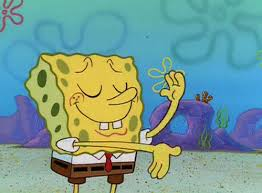